## Challenge - Air Pollution(https://www.kaggle.com/c/air-pollution-prediction/overview)
It is winter time in Delhi so Cody decided to go for a walk to the news stand and on reaching was surprised to see the air quality index of Delhi in the newspaper . So he decided to collect the air samples of different locations and then took these samples to his lab where he extracted `five features` of the air he collected which can be used to predict the air quality index and combined it with the air quality index given in the newspapers. You are provided with the data collected by Cody and your job is to design a machine learning model , which is given by the features extracted by Cody to predict air quality.


submit file like sample_submittion format :- 

| Id | target|
|-------|-----|
|0 |ans0|
|1 |ans1|
|2 |ans2|
|3 |ans3|
|4 |ans4|
|5 |ans5|
|6 |ans6|

In [62]:
# loading Dataset
import pandas as pd
train = pd.read_csv('Datasets/Assignment2_Train.csv')
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [63]:
train.shape # 5 are features; 1 is target

(1600, 6)

In [64]:
train.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'target'],
      dtype='object')

In [65]:
X = train[train.columns[:-1]]
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [66]:
Y = train[train.columns[-1]]
Y.head()

0   -82.154667
1   -48.897960
2    77.270371
3    -2.988581
4   -37.596722
Name: target, dtype: float64

In [67]:
X.shape, Y.shape

((1600, 5), (1600,))

In [68]:
type(X)

pandas.core.frame.DataFrame

In [69]:
import pandas as pd

In [70]:
# preprocessing 
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = pd.DataFrame(s.fit_transform(X))
# output for test file
test = pd.read_csv('Datasets/Assignment2_Test.csv')
test = s.transform(test.values)

In [71]:
type(X)

pandas.core.frame.DataFrame

In [72]:
X.describe()

,0,1,2,3,4
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,-2.331468e-17,-1.776357e-17,-1.776357e-17,2.331468e-17,8.881784e-18
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-3.394334e+00,-3.218189e+00,-3.073464e+00,-3.154539e+00,-2.927091e+00
25%,-6.532217e-01,-6.631960e-01,-6.544315e-01,-6.560276e-01,-6.417809e-01
50%,-4.487509e-03,-1.582564e-02,3.151454e-03,1.244233e-02,-2.609701e-02
75%,6.800261e-01,6.589081e-01,6.758504e-01,6.772709e-01,6.522049e-01
max,3.292885e+00,3.393682e+00,3.223719e+00,2.977582e+00,3.383015e+00


In [73]:
Y.describe()

count    1600.000000
mean        0.318835
std       110.741562
min      -379.829794
25%       -71.897040
50%        -0.610665
75%        71.226603
max       337.643014
Name: target, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=101)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((1200, 5), (400, 5), (1200,), (400,))

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model = LinearRegression()

In [77]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
model.coef_

array([29.85207419, 94.83165412,  8.05996353, 45.23534964,  2.34253763])

In [79]:
model.intercept_

0.6828984772412013

In [80]:
Y_pred = model.predict(X_test)

In [81]:
model.score(X_test,Y_test)

0.9682476621478511

In [82]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9682476621478511

In [83]:
%matplotlib inline

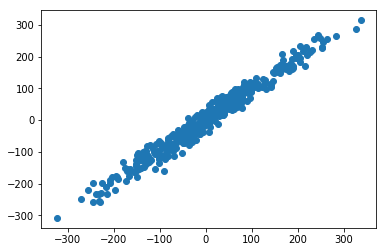

In [84]:
import matplotlib.pyplot as plt 
plt.scatter(Y_test,Y_pred) # approximately linear

In [85]:
# output for test file
test = pd.DataFrame(test)

In [86]:
test.head()

,0,1,2,3,4
0,1.014156,2.059621,-0.219462,-2.336264,-1.014474
1,-0.380266,0.960186,0.663580,0.734423,-0.375628
2,-1.031635,0.969787,-0.359367,-1.788688,0.453005
3,-2.501395,0.560382,0.638368,-0.555246,-1.355645
4,-0.389949,-0.789089,1.387127,-0.497137,0.408771


In [87]:
test.describe()

,0,1,2,3,4
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.025996,0.014487,0.033092,0.007419,0.019432
std,0.982084,1.000121,1.030062,1.017343,0.958216
min,-2.576064,-2.902958,-2.692526,-2.949381,-2.560900
25%,-0.791048,-0.600358,-0.727477,-0.676770,-0.614510
50%,-0.008899,-0.048541,-0.064106,0.001629,0.036103
75%,0.679685,0.749801,0.789482,0.687178,0.587112
max,3.250423,2.564306,2.920374,2.659714,2.921637


In [88]:
output = model.predict(test)

In [89]:
output.shape

(400,)

In [90]:
type(output)

numpy.ndarray

In [91]:
output.dtype

dtype('float64')

In [92]:
df = pd.DataFrame(output, index = [i for i in range(output.shape[0])], columns= ['target'])

In [93]:
df.head()

,target
0,116.447831
1,118.077583
2,-20.894286
3,-43.994147
4,-96.138932


In [94]:
df.index.name = 'Id'

In [95]:
df.head()

,target
Id,
0,116.447831
1,118.077583
2,-20.894286
3,-43.994147
4,-96.138932


In [96]:
df.to_csv('Datasets/Assignment2_output.csv') # 33 rank with score of 0.96802

# Using code from Scratch

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [98]:

# theta will be np.array([theta0,theta1,.............,thetaN])
def error(X,Y,theta):
    hx = hypothesis(X,theta)    
    return (0.5) * np.sum((hx-Y)**2)
    
def hypothesis(X,theta):    
    # returning h(Xi) for each sample (Xi) hence returning an array of size X.shape[0]
    data = np.sum(X*theta[1:], axis=1) + theta[0]
    return data

    
def gradient(X,Y,theta):    
    grad = np.zeros(X.shape[1]+1) # n-featured data have (n+1) parameters.
    hx = hypothesis(X,theta)    
    grad[0] = np.sum((hx-Y))
    
    for i in range(1,len(grad)) :
        # d(cost) / d(theta[i]) = sum((hx-y)*x[i])
        grad[i] = np.sum( (hx-Y) * X[:,i-1])
    return grad
    
    
def gradientDescent_multivariate(X,Y,learning_rate=0.0001):

    theta = np.zeros(X.shape[1]+1)
    error_list = []    
    err = error(X,Y,theta)
    error_list.append(err)
    
    while True:
        grad = gradient(X,Y,theta)
        theta = theta - learning_rate * grad     
        err = error(X,Y,theta)
        error_change = abs(err - error_list[-1]) 
        error_list.append(err)        
        if error_change < 0.00001:
            break
        
    return theta,error_list


In [99]:
theta,error = gradientDescent_multivariate(X_train.values,Y_train.values)

In [100]:
theta

array([ 0.68287854, 29.85199475, 94.83151151,  8.05984701, 45.23524455,
        2.34249223])

In [111]:
# prediction
test.shape

(400, 5)

In [112]:
hypo = theta[0] + theta[1]*test[0] + theta[2]*test[1] + theta[3]*test[2] + theta[4]*test[3] + theta[5]*test[4]

In [113]:
hypo.shape

(400,)

In [117]:
output = hypo.values

In [118]:
type(output)

numpy.ndarray

In [119]:
output.dtype

dtype('float64')

In [120]:
df = pd.DataFrame(output, index = [i for i in range(output.shape[0])], columns= ['target'])

In [121]:
df.head()

,target
0,116.447754
1,118.077318
2,-20.894153
3,-43.994003
4,-96.138936


In [122]:
df.index.name = 'Id'

In [123]:
df.head()

,target
Id,
0,116.447754
1,118.077318
2,-20.894153
3,-43.994003
4,-96.138936


In [124]:
df.to_csv('Datasets/Assignment2_output_scratch.csv') # 33 rank with score of 0.96802

## Thank you!